# Reconociendo señales de tráfico 
 
El objetivo de este proyecto es construir un modelo capaz de determinar el tipo de señal de tráfico que se muestra en una imagen capturada en diferentes condiciones de la vida real y que muestre obstrucciones, mala iluminación o incluso que la señal esté lejos de la cámara. Le proporcionamos imágenes etiquetadas ya divididas en tres archivos (entrenamiento / validación / prueba) y una lista predefinida de signos para reconocer.

In [ ]:
import os

dataroot = "datos/dataroot/"
os.makedirs(dataroot, exist_ok=True)  


!curl -o datos/dataroot/data_1.zip https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!curl -o datos/dataroot/data_2.zip https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip
!curl -o datos/dataroot/data_3.zip https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 30.5M    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 46 30.5M   46 14.3M    0     0  5826k      0  0:00:05  0:00:02  0:00:03 5831k
 83 30.5M   83 25.6M    0     0  7470k      0  0:00:04  0:00:03  0:00:01 7474k
100 30.5M  100 30.5M    0     0  7934k      0  0:00:03  0:00:03 --:--:-- 7937k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:-

In [3]:
# Descomprimir 
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [4]:
# Cargar nombres de las señales 
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [7]:
# cargar las imágenes 
import pickle
signimages = pickle.load( open( "datos/dataroot/RTS/train.p", "rb" ) )

The image shows a Turn left ahead sign


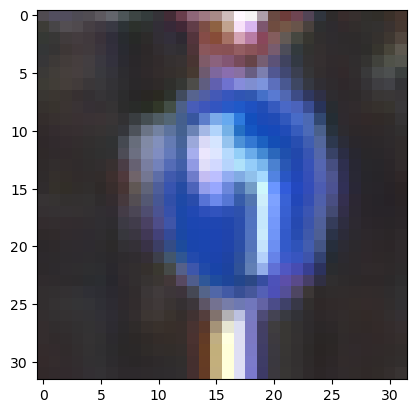

In [ ]:
# ver imagen 
import matplotlib.pyplot as plt
import numpy as np
import cv2

inx = 20124
plt.imshow(signimages['features'][inx])
print("The image shows a {} sign".format(signnames[signimages['labels'][inx]]))